# Reference
- AlexNet GitHub: https://github.com/pytorch/vision/blob/main/torchvision/models/alexnet.py and https://github.com/soapisnotfat/pytorch-cifar10/blob/master/models/AlexNet.py

# Get the CIFAR-10 dataset
Reference: https://d2l.ai/chapter_computer-vision/kaggle-cifar10.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# dataloader
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Implementing AlexNet for CIFAR-10

In [3]:
import torch.nn as nn

'''
modified to fit dataset size
'''
NUM_CLASSES = 10


class AlexNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [4]:
criterion = torch.nn.CrossEntropyLoss()

In [5]:
def train(epochs, model, criterion, optimizer, train_loader, test_loader):
    train_err_lst = []
    test_err_lst = []
    for epoch in range(epochs):
        train_err = train_epoch(model, criterion, optimizer, train_loader)
        test_err = test(model, test_loader)
        train_err_lst.append(train_err)
        test_err_lst.append(test_err)
        print('Epoch {:03d}/{:03d}, Train Error {:.2f}% || Test Error {:.2f}%'.format(epoch, epochs, train_err*100, test_err*100))
    return train_err_lst, test_err_lst
    
def train_epoch(model, criterion, optimizer, loader):
    total_correct = 0.
    total_samples = 0.
    
    for batch_idx, (data, target) in enumerate(loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

            # insert code to feed the data to the model and collect its output
            output = model(data)

            # insert code to compute the loss from output and the true target
            loss = criterion(output, target)
        
            # insert code to update total_correct and total_samples
            # total_correct: total number of correctly classified samples
            # total_samples: total number of samples seen so far
            total_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total_samples += len(target)

            # insert code to update the parameters using optimizer
            # be careful in this part as an incorrect implementation will affect
            # all your experiments and have a significant impact on your grade!
            # in particular, note that pytorch does --not-- automatically
            # clear the parameter's gradients: check tutorials to see
            # how this can be done with a single method call.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    return 1 - total_correct/total_samples
    
def test(model, loader):
    total_correct = 0.
    total_samples = 0.
    model.eval()
    
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loader):
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            # insert code to feed the data to the model and collect its output
            output = model(data)

            # insert code to update total_correct and total_samples
            # total_correct: total number of correctly classified samples
            # total_samples: total number of samples seen so far
            total_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            total_samples += len(target)

    return 1 - total_correct/total_samples

In [ ]:
lr = 1
model = AlexNet().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [ ]:
train_errs, test_errs = train(10, model, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 89.59% || Test Error 90.00%
Epoch 001/010, Train Error 90.00% || Test Error 90.00%
Epoch 002/010, Train Error 90.00% || Test Error 90.00%


KeyboardInterrupt: ignored

Let's try to find a better learning rate:

In [ ]:
lr = 0.1
model = AlexNet().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [ ]:
# Running Time of this codes is 4 minutes
train_errs, test_errs = train(10, model, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 82.32% || Test Error 71.85%
Epoch 001/010, Train Error 60.11% || Test Error 53.12%
Epoch 002/010, Train Error 45.77% || Test Error 43.30%
Epoch 003/010, Train Error 36.88% || Test Error 38.48%
Epoch 004/010, Train Error 30.64% || Test Error 32.08%
Epoch 005/010, Train Error 25.33% || Test Error 27.79%
Epoch 006/010, Train Error 21.37% || Test Error 28.05%
Epoch 007/010, Train Error 17.31% || Test Error 27.17%
Epoch 008/010, Train Error 14.51% || Test Error 26.43%
Epoch 009/010, Train Error 11.63% || Test Error 26.52%


The original model takes 13 minutes to run.

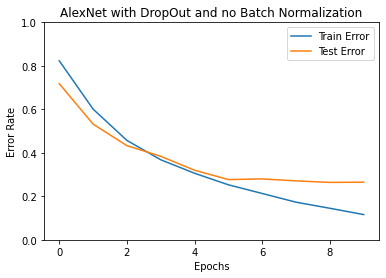

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

epochs = [i for i in range(10)]
train_errs = [0.823, 0.601, 0.457, 0.368, 0.306, 0.253, 0.213, 0.173, 0.145, 0.116]
test_errs = [0.718, 0.532, 0.433, 0.384, 0.320, 0.277, 0.280, 0.271, 0.264, 0.265]
plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.ylim(0,1)
plt.legend()
plt.title("AlexNet with DropOut and no Batch Normalization")
plt.show()

In [ ]:
lr = 0.01
model = AlexNet().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
train_errs, test_errs = train(10, model, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 89.70% || Test Error 90.00%
Epoch 001/010, Train Error 85.45% || Test Error 79.21%
Epoch 002/010, Train Error 76.37% || Test Error 70.95%
Epoch 003/010, Train Error 64.00% || Test Error 59.14%
Epoch 004/010, Train Error 57.30% || Test Error 53.25%
Epoch 005/010, Train Error 50.74% || Test Error 49.96%
Epoch 006/010, Train Error 45.93% || Test Error 47.13%
Epoch 007/010, Train Error 40.71% || Test Error 43.08%
Epoch 008/010, Train Error 37.59% || Test Error 38.30%
Epoch 009/010, Train Error 34.18% || Test Error 35.56%


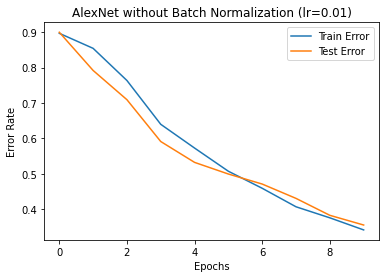

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

epochs = [i for i in range(10)]
plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.legend()
plt.title("AlexNet without Batch Normalization (lr=0.01)")
plt.show()

10 epoches' training time is around 14 minutes and the training error and test errors constantly dropping! This is an surprise and I decide to train the model with more steps.

ok, it looks like the best learning rate is 0.1...

# AlexNet no dropout

In [6]:
import torch.nn as nn

'''
modified to fit dataset size
'''
NUM_CLASSES = 10


class AlexNet_no_dropout(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet_no_dropout, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [7]:
lr = 0.1
model = AlexNet_no_dropout().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train_errs, test_errs = train(10, model, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 89.59% || Test Error 90.00%
Epoch 001/010, Train Error 83.74% || Test Error 81.48%
Epoch 002/010, Train Error 75.52% || Test Error 70.42%
Epoch 003/010, Train Error 68.23% || Test Error 63.69%
Epoch 004/010, Train Error 62.67% || Test Error 62.32%
Epoch 005/010, Train Error 58.11% || Test Error 62.75%
Epoch 006/010, Train Error 53.99% || Test Error 53.94%
Epoch 007/010, Train Error 50.71% || Test Error 48.08%
Epoch 008/010, Train Error 47.21% || Test Error 52.16%
Epoch 009/010, Train Error 44.39% || Test Error 50.28%


In [15]:
# train another 20 epochs
train_errs, test_errs = train(20, model, criterion, optimizer, trainloader, testloader)

Epoch 000/020, Train Error 41.01% || Test Error 44.21%
Epoch 001/020, Train Error 38.52% || Test Error 40.28%
Epoch 002/020, Train Error 36.25% || Test Error 36.19%
Epoch 003/020, Train Error 33.08% || Test Error 44.12%
Epoch 004/020, Train Error 31.09% || Test Error 35.28%
Epoch 005/020, Train Error 28.63% || Test Error 37.75%
Epoch 006/020, Train Error 26.04% || Test Error 36.12%
Epoch 007/020, Train Error 23.74% || Test Error 32.20%
Epoch 008/020, Train Error 21.21% || Test Error 31.21%
Epoch 009/020, Train Error 19.22% || Test Error 31.03%
Epoch 010/020, Train Error 16.68% || Test Error 32.06%
Epoch 011/020, Train Error 13.83% || Test Error 31.43%


KeyboardInterrupt: ignored

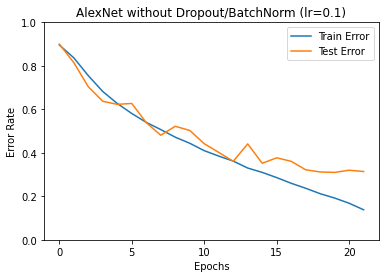

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

epochs = [i for i in range(22)]
train_errs = [0.896, 0.837, 0.755, 0.682, 0.627, 0.581, 0.54, 0.507, 0.472, 0.444, \
              0.410, 0.385, 0.362, 0.330, 0.310, 0.286, 0.260, 0.237, 0.212, 0.192, 0.168, 0.138]
test_errs = [0.9, 0.815, 0.704, 0.637, 0.623, 0.627, 0.539, 0.481, 0.522, 0.503, \
             0.442, 0.402, 0.361, 0.441, 0.352, 0.377, 0.361, 0.322, 0.312, 0.310, 0.320, 0.314]

plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.ylim(0,1)
plt.legend()
plt.title("AlexNet without Dropout/BatchNorm (lr=0.1)")
plt.show()

# Adding Batch Normalization to AlexNet

Note that as usual, the high-level API variant runs much faster because its code has been compiled to C++ or CUDA while the paper's custom implementation must be interpreted by Python.

In [ ]:
import torch
from torch import nn


def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use `is_grad_enabled` to determine whether the current mode is training
    # mode or prediction mode
    if not torch.is_grad_enabled():
        # If it is prediction mode, directly use the mean and variance
        # obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully-connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of `X`, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used for the
        # standardization
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # `num_features`: the number of outputs for a fully-connected layer
    # or the number of output channels for a convolutional layer. `num_dims`:
    # 2 for a fully-connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If `X` is not on the main memory, copy `moving_mean` and
        # `moving_var` to the device where `X` is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated `moving_mean` and `moving_var`
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

In [ ]:
class AlexNetBatchNorm(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNetBatchNorm, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            BatchNorm(64, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            BatchNorm(192, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            BatchNorm(384, num_dims=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            BatchNorm(256, num_dims=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            BatchNorm(256, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            BatchNorm(4096, num_dims=2),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            BatchNorm(4096, num_dims=2),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [ ]:
lr = 0.1
alexnet_bn = AlexNetBatchNorm().cuda()
optimizer = torch.optim.SGD(alexnet_bn.parameters(), lr=lr)
train_errs, test_errs = train(10, alexnet_bn, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 67.42% || Test Error 66.28%
Epoch 001/010, Train Error 43.10% || Test Error 48.67%
Epoch 002/010, Train Error 31.89% || Test Error 54.98%
Epoch 003/010, Train Error 25.90% || Test Error 45.19%
Epoch 004/010, Train Error 21.03% || Test Error 53.30%
Epoch 005/010, Train Error 17.07% || Test Error 38.24%
Epoch 006/010, Train Error 13.88% || Test Error 31.06%
Epoch 007/010, Train Error 10.75% || Test Error 46.84%
Epoch 008/010, Train Error 8.37% || Test Error 43.86%
Epoch 009/010, Train Error 6.33% || Test Error 31.88%


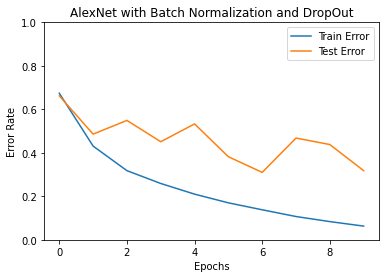

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

epochs = [i for i in range(10)]

train_errs = [0.674, 0.431, 0.318, 0.259, 0.210, 0.170, 0.138, 0.107, 0.0837, 0.063]
test_errs = [0.662, 0.486, 0.549, 0.451, 0.533, 0.382, 0.310, 0.468, 0.438, 0.318]

plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.ylim(0,1)
plt.legend()
plt.title("AlexNet with Batch Normalization and DropOut")
plt.show()

After trying 10 epochs, it runs 16 minutes, which is even slower than the original AlexNet training time (which is 13 minutes running on Google Colab with GPU acceleration). The train error is smaller, however, there is some overfitting issue that the test error rate after batch normalization is even higher

It's overfitting now and it already takes 20 minutes to run, so I interrupted the codes to make it stop running (and save my credit!)

In [ ]:
lr = 0.01
alexnet_bn = AlexNetBatchNorm().cuda()
optimizer = torch.optim.SGD(alexnet_bn.parameters(), lr=lr)
train_errs, test_errs = train(100, alexnet_bn, criterion, optimizer, trainloader, testloader)

Epoch 000/100, Train Error 65.40% || Test Error 55.65%
Epoch 001/100, Train Error 41.80% || Test Error 43.65%
Epoch 002/100, Train Error 31.36% || Test Error 40.41%
Epoch 003/100, Train Error 23.70% || Test Error 35.98%
Epoch 004/100, Train Error 17.57% || Test Error 38.75%
Epoch 005/100, Train Error 11.41% || Test Error 32.74%
Epoch 006/100, Train Error 6.18% || Test Error 38.85%
Epoch 007/100, Train Error 2.40% || Test Error 33.00%
Epoch 008/100, Train Error 0.48% || Test Error 31.05%
Epoch 009/100, Train Error 0.06% || Test Error 29.82%
Epoch 010/100, Train Error 0.00% || Test Error 29.97%
Epoch 011/100, Train Error 0.00% || Test Error 29.75%


KeyboardInterrupt: ignored

### Change the optimizer to Adam

In [ ]:
lr = 0.1
alexnet_bn = AlexNetBatchNorm().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet_bn.parameters(), lr=3e-4)
train_errs, test_errs = train(3, alexnet_bn, criterion, optimizer, trainloader, testloader)

Epoch 000/003, Train Error 52.02% || Test Error 42.29%
Epoch 001/003, Train Error 33.54% || Test Error 41.97%
Epoch 002/003, Train Error 26.00% || Test Error 32.17%


## Try 10 epochs instead of just 3 epochs

In [ ]:
lr = 0.1
alexnet_bn = AlexNetBatchNorm().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet_bn.parameters(), lr=3e-4)
train_errs, test_errs = train(10, alexnet_bn, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 51.21% || Test Error 42.88%
Epoch 001/010, Train Error 32.88% || Test Error 34.52%
Epoch 002/010, Train Error 25.52% || Test Error 30.95%
Epoch 003/010, Train Error 19.95% || Test Error 29.31%
Epoch 004/010, Train Error 15.08% || Test Error 32.52%
Epoch 005/010, Train Error 11.71% || Test Error 29.33%
Epoch 006/010, Train Error 8.68% || Test Error 28.88%
Epoch 007/010, Train Error 6.53% || Test Error 30.72%
Epoch 008/010, Train Error 5.05% || Test Error 26.46%
Epoch 009/010, Train Error 4.37% || Test Error 27.26%


The model doesn't perform good. It achieves a good train error rate, but a bad test error rate.

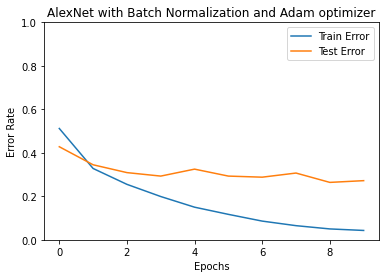

In [9]:
epochs = [i for i in range(10)]
train_errs = [0.512, 0.328, 0.255, 0.199, 0.150, 0.117, 0.086, 0.065, 0.050, 0.043]
test_errs = [0.428, 0.345, 0.309, 0.293, 0.325, 0.293, 0.288, 0.307, 0.264, 0.272]
plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.ylim(0, 1)
plt.legend()
plt.title("AlexNet with Batch Normalization and Adam optimizer")
plt.show()

# Use Xavier initialization to AlexNet

In [ ]:
class AlexNetBatchNorm_XavierInit(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNetBatchNorm_XavierInit, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            BatchNorm(64, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            BatchNorm(192, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            BatchNorm(384, num_dims=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            BatchNorm(256, num_dims=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            BatchNorm(256, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            BatchNorm(4096, num_dims=2),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            BatchNorm(4096, num_dims=2),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                sigma = np.sqrt(1/((3**2)*m.out_channels)) 
                m.weight.data.normal_(0, sigma)
                m.bias.data.zero_()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [ ]:
lr = 0.1
alexnet_bn_xavier = AlexNetBatchNorm_XavierInit().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet_bn_xavier.parameters(), lr=3e-4)
train_errs_lst, test_errs_lst = train(10, alexnet_bn_xavier, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 52.58% || Test Error 40.81%
Epoch 001/010, Train Error 33.40% || Test Error 34.91%
Epoch 002/010, Train Error 25.09% || Test Error 30.17%
Epoch 003/010, Train Error 19.86% || Test Error 29.83%
Epoch 004/010, Train Error 14.55% || Test Error 30.20%
Epoch 005/010, Train Error 10.84% || Test Error 28.41%
Epoch 006/010, Train Error 7.94% || Test Error 28.43%
Epoch 007/010, Train Error 6.03% || Test Error 29.00%
Epoch 008/010, Train Error 4.86% || Test Error 29.15%
Epoch 009/010, Train Error 3.94% || Test Error 26.60%


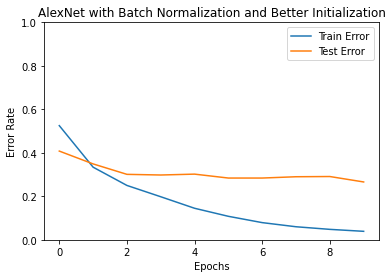

In [4]:
epochs = [i for i in range(10)]

train_errs = [0.525, 0.334, 0.250, 0.198, 0.145, 0.108, 0.079, 0.060, 0.048, 0.039]
test_errs = [0.408, 0.349, 0.301, 0.298, 0.302, 0.284, 0.284, 0.290, 0.291, 0.266]

plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.ylim(0,1)
plt.legend()
plt.title("AlexNet with Batch Normalization and Better Initialization")
plt.show()

It costs 16 minutes to run 10 epochs for this model. Sadly, the test error rate stops improved after the fifth epoch and never drops below 5

# Remove dropout layer after Batch Normalization

In [ ]:
class AlexNetBN_RemoveDropout(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNetBN_RemoveDropout, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            BatchNorm(64, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            BatchNorm(192, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            BatchNorm(384, num_dims=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            BatchNorm(256, num_dims=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            BatchNorm(256, num_dims=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 4096),
            BatchNorm(4096, num_dims=2),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            BatchNorm(4096, num_dims=2),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [ ]:
lr = 0.1
alexnet_bn_no_dropout = AlexNetBN_RemoveDropout().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet_bn_no_dropout.parameters(), lr=3e-4)
train_errs, test_errs = train(3, alexnet_bn_no_dropout, criterion, optimizer, trainloader, testloader)

Epoch 000/003, Train Error 46.18% || Test Error 39.15%
Epoch 001/003, Train Error 31.66% || Test Error 34.98%
Epoch 002/003, Train Error 25.17% || Test Error 32.34%


This three epochs' performance is not bad and it takes 4 minutes to run. I would try 10 epochs.

In [ ]:
lr = 0.1
alexnet_bn_no_dropout = AlexNetBN_RemoveDropout().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet_bn_no_dropout.parameters(), lr=3e-4)
train_errs, test_errs = train(10, alexnet_bn_no_dropout, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 45.90% || Test Error 42.26%
Epoch 001/010, Train Error 31.23% || Test Error 35.07%
Epoch 002/010, Train Error 24.00% || Test Error 33.92%
Epoch 003/010, Train Error 18.52% || Test Error 31.20%
Epoch 004/010, Train Error 14.00% || Test Error 30.79%
Epoch 005/010, Train Error 10.78% || Test Error 32.13%
Epoch 006/010, Train Error 7.91% || Test Error 30.68%
Epoch 007/010, Train Error 6.07% || Test Error 29.25%
Epoch 008/010, Train Error 5.13% || Test Error 29.83%
Epoch 009/010, Train Error 4.30% || Test Error 29.66%


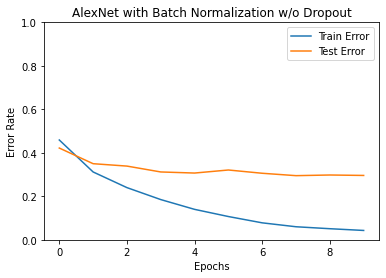

In [23]:
epochs = [i for i in range(10)]

train_errs = [0.459, 0.312, 0.240, 0.185, 0.140, 0.107, 0.078, 0.060, 0.051,0.043]
test_errs = [0.422, 0.350, 0.339, 0.312, 0.307, 0.321, 0.306, 0.295, 0.298, 0.296]

plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.ylim(0,1)
plt.legend()
plt.title("AlexNet with Batch Normalization w/o Dropout")
plt.show()

The 10 epochs AlexNet with Batch 

In [ ]:
class AlexNetBN_RemoveDropout_API(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNetBN_RemoveDropout_API, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 4096),
            nn.BatchNorm2d(4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.BatchNorm2d(4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [ ]:
lr = 0.1
alexnet_bn_no_dropout_api = AlexNetBN_RemoveDropout().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet_bn_no_dropout_api.parameters(), lr=3e-4)
train_errs, test_errs = train(10, alexnet_bn_no_dropout_api, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 46.05% || Test Error 38.37%
Epoch 001/010, Train Error 30.77% || Test Error 33.41%
Epoch 002/010, Train Error 23.86% || Test Error 32.96%
Epoch 003/010, Train Error 18.51% || Test Error 31.04%
Epoch 004/010, Train Error 13.52% || Test Error 32.78%
Epoch 005/010, Train Error 10.07% || Test Error 30.27%
Epoch 006/010, Train Error 7.98% || Test Error 31.82%
Epoch 007/010, Train Error 6.13% || Test Error 28.57%
Epoch 008/010, Train Error 5.14% || Test Error 28.43%
Epoch 009/010, Train Error 4.41% || Test Error 30.42%


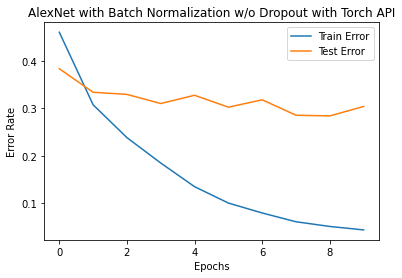

In [ ]:
epochs = [i for i in range(10)]
plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.legend()
plt.title("AlexNet with Batch Normalization w/o Dropout with Torch API")
plt.show()

The training time is not shorter with Batch Normalization with high-level API. It's still 16 minutes.

# Adding L2 Regularization

In [ ]:
lr = 0.1
alexnet_bn = AlexNetBatchNorm().cuda()
optimizer = torch.optim.Adam(alexnet_bn.parameters(), lr=3e-4, weight_decay=0.0001)
train_errs, test_errs = train(10, alexnet_bn, criterion, optimizer, trainloader, testloader)

Epoch 000/010, Train Error 52.19% || Test Error 37.47%
Epoch 001/010, Train Error 33.11% || Test Error 33.28%
Epoch 002/010, Train Error 25.57% || Test Error 36.14%
Epoch 003/010, Train Error 20.17% || Test Error 27.85%
Epoch 004/010, Train Error 15.66% || Test Error 30.52%
Epoch 005/010, Train Error 11.66% || Test Error 31.51%
Epoch 006/010, Train Error 8.98% || Test Error 27.13%
Epoch 007/010, Train Error 6.33% || Test Error 30.40%
Epoch 008/010, Train Error 5.61% || Test Error 29.56%
Epoch 009/010, Train Error 4.18% || Test Error 28.14%


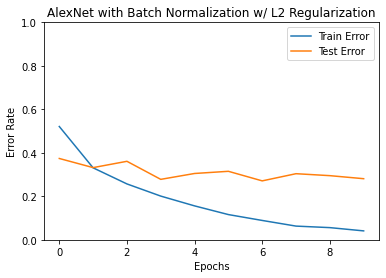

In [3]:
epochs = [i for i in range(10)]

train_errs = [0.521, 0.331, 0.257, 0.201, 0.156, 0.116, 0.089, 0.063, 0.056, 0.041]
test_errs = [0.374, 0.332, 0.361, 0.278, 0.305, 0.315, 0.271, 0.304, 0.295, 0.281]

plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.ylim(0, 1)
plt.legend()
plt.title("AlexNet with Batch Normalization w/ L2 Regularization")
plt.show()

# What if we don't transform the data set

In [ ]:
# import
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# dataloader

trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)
trainloader2 = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=2)
testset2 = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)
testloader2 = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
lr = 0.1
alexnet_bn = AlexNetBatchNorm().cuda()
optimizer = torch.optim.SGD(alexnet_bn.parameters(), lr=lr)
train_errs, test_errs = train(10, alexnet_bn, criterion, optimizer, trainloader2, testloader2)

Epoch 000/010, Train Error 67.79% || Test Error 64.88%
Epoch 001/010, Train Error 44.76% || Test Error 43.46%
Epoch 002/010, Train Error 33.53% || Test Error 45.73%
Epoch 003/010, Train Error 27.48% || Test Error 37.99%
Epoch 004/010, Train Error 21.85% || Test Error 51.18%
Epoch 005/010, Train Error 18.35% || Test Error 35.17%
Epoch 006/010, Train Error 14.55% || Test Error 37.06%
Epoch 007/010, Train Error 11.64% || Test Error 50.02%
Epoch 008/010, Train Error 9.23% || Test Error 29.01%
Epoch 009/010, Train Error 7.14% || Test Error 32.08%


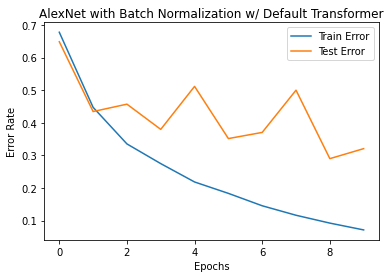

In [ ]:
epochs = [i for i in range(10)]
plt.plot(epochs, train_errs, label="Train Error")
plt.plot(epochs, test_errs, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.legend()
plt.title("AlexNet with Batch Normalization w/ Default Transformer")
plt.show()